
### Building a Student Graduation Prediction System

In [1]:
import numpy as np
import pandas as pd
#will import the Regression/SVM/Classifier lib in code itself

In [2]:
# Read student data
student_data = pd.read_csv("student-data.csv")
print( "Student data read successfully!")
# Note: The last column 'passed' is the target/label, all other are feature columns

Student data read successfully!


In [3]:
n_students = student_data.shape[0]
n_features = student_data.shape[1] - 1
n_passed = student_data[student_data['passed'] == 'yes'].shape[0]
n_failed = student_data[student_data['passed'] == 'no'].shape[0]
grad_rate = float(n_passed*1.0 / n_students*1.0)*100
print ("Total number of students: {}".format(n_students))
print ("Number of students who passed: {}".format(n_passed))
print ("Number of students who failed: {}".format(n_failed))
print ("Number of features: {}".format(n_features))
print ("Graduation rate of the class: {:.2f}%".format(grad_rate))

Total number of students: 395
Number of students who passed: 265
Number of students who failed: 130
Number of features: 30
Graduation rate of the class: 67.09%


<AxesSubplot:>

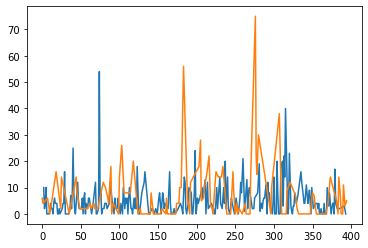

In [4]:
%matplotlib inline
student_data[student_data['passed'] == 'yes']['absences'].plot()
student_data[student_data['passed'] == 'no']['absences'].plot()

In [5]:
feature_cols = list(student_data.columns[:-1])  # all columns but last are features
target_col = student_data.columns[-1]  # last column is the target/label
print ("Feature column(s):-\n{}".format(feature_cols))
print ("Target column: {}".format(target_col))
X_all = student_data[feature_cols]  
y_all = student_data[target_col]  
X_all.head() 

Feature column(s):-
['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']
Target column: passed


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,yes,no,no,4,3,4,1,1,3,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,yes,no,5,3,3,1,1,3,4
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,yes,no,4,3,2,2,3,3,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,yes,3,2,2,1,1,5,2
4,GP,F,16,U,GT3,T,3,3,other,other,...,yes,no,no,4,3,2,1,2,5,4


In [6]:
def preprocess_features(X):
    outX = pd.DataFrame(index=X.index)  

    
    for col, col_data in X.iteritems():
        
        if col_data.dtype == object:
            col_data = col_data.replace(['yes', 'no'], [1, 0])
        # converting to binary for Regression consumptions

        # If still non-numeric, convert to one or more dummy variables
        if col_data.dtype == object:
            col_data = pd.get_dummies(col_data, prefix=col)  # e.g. 'school' => 'school_GP', 'school_MS'

        outX = outX.join(col_data)  # collect column(s) in output dataframe

    return outX

X_all = preprocess_features(X_all)
print ("Processed feature columns ({}):-\n{}".format(len(X_all.columns), list(X_all.columns)))

Processed feature columns (48):-
['school_GP', 'school_MS', 'sex_F', 'sex_M', 'age', 'address_R', 'address_U', 'famsize_GT3', 'famsize_LE3', 'Pstatus_A', 'Pstatus_T', 'Medu', 'Fedu', 'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'reason_course', 'reason_home', 'reason_other', 'reason_reputation', 'guardian_father', 'guardian_mother', 'guardian_other', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']


In [7]:
from sklearn.model_selection import train_test_split

num_all = student_data.shape[0] 
num_train = 300  
num_test = num_all - num_train

X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.25, train_size = 0.75, random_state=42)


In [8]:

import time
 
from sklearn import tree
def train_classifier(clf, X_train, y_train):
    print ("Training {}...".format(clf.__class__.__name__))
    start = time.time()
    clf.fit(X_train, y_train)
    end = time.time()
    print ("Done!\nTraining time (secs): {:.3f}".format(end - start))


clf = tree.DecisionTreeClassifier()


train_classifier(clf, X_train, y_train)  

Training DecisionTreeClassifier...
Done!
Training time (secs): 0.005


In [9]:

from sklearn.metrics import f1_score

def predict_labels(clf, features, target):
    
    start = time.time()
    y_pred = clf.predict(features)
    end = time.time()
  
    return f1_score(target.values, y_pred, pos_label='yes')

train_f1_score = predict_labels(clf, X_train, y_train)
print ("F1 score for training set: {}".format(train_f1_score))

F1 score for training set: 1.0


In [10]:
print ("F1 score for test set: {}".format(predict_labels(clf, X_test, y_test)))

F1 score for test set: 0.65625


In [11]:
def train_predict(clf, X_train, y_train, X_test, y_test):
  
   
    train_classifier(clf, X_train, y_train)
    

clf = tree.DecisionTreeClassifier()
train_predict(clf, X_train[:100], y_train[:100], X_test, y_test)
train_predict(clf, X_train[:200], y_train[:200], X_test, y_test)
train_predict(clf, X_train, y_train, X_test, y_test)

Training DecisionTreeClassifier...
Done!
Training time (secs): 0.006
Training DecisionTreeClassifier...
Done!
Training time (secs): 0.006
Training DecisionTreeClassifier...
Done!
Training time (secs): 0.009


In [12]:
from sklearn.svm import SVC
clf = SVC(probability=True)
train_predict(clf, X_train[:100], y_train[:100], X_test, y_test)
train_predict(clf, X_train[:200], y_train[:200], X_test, y_test)
train_predict(clf, X_train, y_train, X_test, y_test)

Training SVC...
Done!
Training time (secs): 0.014
Training SVC...
Done!
Training time (secs): 0.025
Training SVC...
Done!
Training time (secs): 0.015


In [13]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
train_predict(clf, X_train[:100], y_train[:100], X_test, y_test)
train_predict(clf, X_train[:200], y_train[:200], X_test, y_test)
train_predict(clf, X_train, y_train, X_test, y_test)

Training GaussianNB...
Done!
Training time (secs): 0.002
Training GaussianNB...
Done!
Training time (secs): 0.003
Training GaussianNB...
Done!
Training time (secs): 0.005


In [14]:
from sklearn import ensemble
clf = ensemble.RandomForestClassifier()

train_predict(clf, X_train[:100], y_train[:100], X_test, y_test)
train_predict(clf, X_train[:200], y_train[:200], X_test, y_test)
train_predict(clf, X_train, y_train, X_test, y_test)

Training RandomForestClassifier...
Done!
Training time (secs): 0.133
Training RandomForestClassifier...
Done!
Training time (secs): 0.220
Training RandomForestClassifier...
Done!
Training time (secs): 0.239


In [15]:
y_train

16     yes
66     yes
211    yes
7       no
19     yes
      ... 
71     yes
106     no
270     no
348    yes
102    yes
Name: passed, Length: 296, dtype: object

In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import StratifiedShuffleSplit

clf = SVC(probability=True)
param_grid = [
  {'C': [1, 10, 100, 200, 300, 400, 500, 600, 700],
   'gamma': [1e-2, 1e-3, 1e-4, 1e-5, 1e-6],
   'kernel': ['rbf'], 'tol':[1e-3, 1e-4, 1e-5, 1e-6]
  }
 ]

gs = GridSearchCV(clf, param_grid,scoring='f1_weighted')
gs.fit(X_train, y_train)
reg = gs.best_estimator_
print (reg)
train_f1_score = predict_labels(reg, X_train, y_train)
print ("F1 score for training set: {}".format(train_f1_score))

print ("F1 score for test set: {}".format(predict_labels(reg, X_test, y_test)))

SVC(C=100, gamma=0.001, probability=True)
F1 score for training set: 0.8803611738148984
F1 score for test set: 0.8163265306122449


In [17]:
y_train

16     yes
66     yes
211    yes
7       no
19     yes
      ... 
71     yes
106     no
270     no
348    yes
102    yes
Name: passed, Length: 296, dtype: object

In [18]:
import pickle

In [19]:
data={"model":gs}
with open('saved_steps.pkl','wb') as file:
    pickle.dump(data,file)

In [20]:
with open('saved_steps.pkl','rb') as file:
    data=pickle.load(file)

In [21]:
Model_loaded=data["model"]

In [22]:
Model_loaded.predict(X_test)

array(['no', 'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes',
       'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes',
       'yes', 'yes', 'yes', 'yes', 'yes', 'no', 'yes', 'yes', 'yes',
       'yes', 'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'no', 'yes',
       'yes', 'yes', 'no', 'yes', 'yes', 'no', 'yes', 'yes', 'yes', 'yes',
       'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes',
       'no', 'yes', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'no',
       'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'no', 'yes',
       'yes', 'yes', 'no', 'yes', 'yes', 'no', 'yes', 'yes', 'yes', 'yes',
       'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes',
       'yes', 'yes', 'yes', 'yes'], dtype=object)

In [28]:
results=Model_loaded.predict_proba(X_test)

In [57]:
df = y_test.to_frame()

In [58]:
df

,passed
78,yes
371,yes
248,no
55,yes
390,no
...,...
367,no
210,no
75,yes
104,yes


In [75]:
Historical_Final=pd.concat([X_train,y_train],axis=1)
Result_Final_Predicted=pd.concat([X_test, df],axis=1)

In [77]:
Historical_Final["predicted"]=0

In [78]:
Result_Final_Predicted["predicted"]=1

In [83]:
Final=Historical_Final.append(Result_Final_Predicted)

In [86]:
Final.to_csv("PredictedandHistorical.csv")